In [1]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import joblib
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import numpy as np

In [2]:
import polars as pl
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/CSC 581 Project/Turdus_migratorius.parquet"
df = pl.scan_parquet(file_path)
df.head().collect()

Mounted at /content/drive


GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,AGE/SEX,COUNTRY,COUNTRY CODE,STATE,STATE CODE,COUNTY,COUNTY CODE,IBA CODE,BCR CODE,USFWS CODE,ATLAS BLOCK,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,DURATION MINUTES,EFFORT DISTANCE KM,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS
str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,f64,str,str,str,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,i64,i64,i64,f64,str,str
"""URN:CornellLabOfOrnithology:EB…","""2024-05-01 12:32:30.255668""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""5""",null,null,null,null,"""Canada""","""CA""","""Quebec""","""CA-QC""","""Montréal""","""CA-QC-MR""",null,13.0,null,null,"""Jardin botanique de Montréal (…","""L165056""","""H""",45.559656,-73.562608,"""2010-01-27""","""12:05:00""","""obsr351027""","""S161483891""","""Stationary""","""P21""","""EBIRD""",50.0,null,null,1.0,1,null,0,1,0,null,"""Feuillet d'observations quotid…",null
"""URN:CornellLabOfOrnithology:EB…","""2021-04-01 20:27:53.993267""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""22""",null,null,null,null,"""United States""","""US""","""Washington""","""US-WA""","""King""","""US-WA-033""",null,5.0,null,null,"""Burke-Gilman Trail""","""L753933""","""P""",47.753636,-122.268906,"""2010-11-26""","""09:00:00""","""obsr175075""","""S7162313""","""Area""","""P23""","""EBIRD""",60.0,null,12.1406,1.0,1,null,0,1,0,null,null,null
"""URN:CornellLabOfOrnithology:EB…","""2021-03-19 02:24:09.958935""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""3""",null,null,null,null,"""United States""","""US""","""Colorado""","""US-CO""","""Washington""","""US-CO-121""",null,18.0,null,null,"""Last Chance--Rest Area""","""L241543""","""H""",39.739543,-103.593972,"""2010-05-19""","""08:00:00""","""obsr239992""","""S12140858""","""Traveling""","""P22""","""EBIRD""",300.0,8.047,null,2.0,1,null,0,1,0,null,null,null
"""URN:CornellLabOfOrnithology:EB…","""2021-03-24 01:53:26.339857""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""10""",null,null,null,null,"""United States""","""US""","""Utah""","""US-UT""","""Utah""","""US-UT-049""",null,9.0,null,null,"""kuhnis""","""L617141""","""P""",40.197118,-111.640384,"""2010-01-04""","""04:00:00""","""obsr166091""","""S5719862""","""Area""","""P23""","""EBIRD""",30.0,null,1.2141,null,1,null,0,1,0,null,null,null
"""URN:CornellLabOfOrnithology:EB…","""2021-03-18 08:03:28.921522""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""1""",null,null,null,null,"""United States""","""US""","""New Mexico""","""US-NM""","""Los Alamos""","""US-NM-028""",null,16.0,null,null,"""392 Navajo Road""","""L714012""","""P""",35.903443,-106.271803,"""2010-04-08""","""08:00:00""","""obsr184933""","""S6256682""","""Stationary""","""P21""","""EBIRD""",45.0,null,null,1.0,1,null,0,1,0,null,null,null


In [3]:
lots = df.filter(pl.col("OBSERVATION COUNT") == "500000")
lots.collect()

GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,OBSERVATION COUNT,BREEDING CODE,BREEDING CATEGORY,BEHAVIOR CODE,AGE/SEX,COUNTRY,COUNTRY CODE,STATE,STATE CODE,COUNTY,COUNTY CODE,IBA CODE,BCR CODE,USFWS CODE,ATLAS BLOCK,LOCALITY,LOCALITY ID,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION DATE,TIME OBSERVATIONS STARTED,OBSERVER ID,SAMPLING EVENT IDENTIFIER,PROTOCOL TYPE,PROTOCOL CODE,PROJECT CODE,DURATION MINUTES,EFFORT DISTANCE KM,EFFORT AREA HA,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS
str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,f64,str,str,str,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,i64,str,i64,i64,i64,f64,str,str
"""URN:CornellLabOfOrnithology:EB…","""2022-01-13 14:14:14.112923""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""500000""",null,null,null,null,"""United States""","""US""","""Oregon""","""US-OR""","""Crook""","""US-OR-013""",null,9.0,null,null,"""Powell Butte Community Center""","""L10225807""","""H""",44.224277,-121.02622,"""2022-01-12""","""17:16:00""","""obsr679987""","""S100631380""","""Stationary""","""P21""","""EBIRD""",20.0,null,null,1.0,1,null,0,1,1,null,null,"""Huge flock of robins flying ge…"
"""URN:CornellLabOfOrnithology:EB…","""2022-01-08 20:28:25.65927""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""500000""",null,null,null,null,"""United States""","""US""","""Oregon""","""US-OR""","""Crook""","""US-OR-013""",null,9.0,null,null,"""Powell Butte Community Center""","""L10225807""","""H""",44.224277,-121.02622,"""2022-01-07""","""16:45:00""","""obsr408381""","""S100319225""","""Stationary""","""P21""","""EBIRD""",25.0,null,null,1.0,1,null,0,1,1,null,"""Waiting for Short-eared Owls t…","""Number estimated in one field …"
"""URN:CornellLabOfOrnithology:EB…","""2024-02-23 17:03:55.753159""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""500000""",null,null,null,null,"""United States""","""US""","""New Jersey""","""US-NJ""","""Cape May""","""US-NJ-009""","""BIRDLIFE_44512|US-NJ_3032""",30.0,null,null,"""Cape Island* (Cape May Co. sou…","""L267674""","""H""",38.945025,-74.933775,"""1999-11-07""","""06:30:00""","""obsr88405""","""S79711127""","""Historical""","""P62""","""EBIRD""",null,null,null,null,0,null,0,1,1,null,null,"""***Simply shocking morning fli…"
"""URN:CornellLabOfOrnithology:EB…","""2014-05-01 07:03:26""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""500000""",null,null,null,null,"""United States""","""US""","""Texas""","""US-TX""","""Burnet""","""US-TX-053""",null,20.0,null,null,"""Burnet - American Robin flock …","""L2689462""","""P""",30.753638,-98.201981,"""1986-12-30""","""17:00:00""","""obsr161964""","""S17271223""","""Stationary""","""P21""","""EBIRD""",45.0,null,null,1.0,0,null,0,1,1,null,"""I did the Burnet CBC in area 2…","""Adding these records from my o…"
"""URN:CornellLabOfOrnithology:EB…","""2023-10-09 15:59:11.088583""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,null,"""500000""",null,null,null,null,"""United States""","""US""","""Missouri""","""US-MO""","""Phelps""","""US-MO-161""",null,24.0,null,null,"""MO Rolla winter Robins roost (…","""L23054025""","""P""",37.935613,-91.745077,"""2003-12-21""","""16:30:00""","""obsr7266""","""S130936637""","""Historical""","""P62""","""EBIRD""",60.0,null,null,null,0,null,0,1,1,null,null,"""Huge number of robins this win…"
"""URN:CornellLabOfOrnithology:EB…","""2023-10-09 15:59:11.088583""",28313,"""species""","""avibase-D77E4B41""","""American Robin""","""Turdus migratorius""",null,null,n

In [4]:
df = df.with_columns(pl.col("OBSERVATION DATE").str.strptime(pl.Date, format="%Y-%m-%d"))
df = df.with_columns([
    pl.col("OBSERVATION DATE").dt.year().alias("YEAR"),
    pl.col("OBSERVATION DATE").dt.month().alias("MONTH"),
    pl.col("OBSERVATION DATE").dt.ordinal_day().alias("DAY OF YEAR")
])

df = df.with_columns(pl.col("COUNTRY").rank("dense").alias("COUNTRY_ENCODED"),
                     pl.col("STATE").rank("dense").alias("STATE_ENCODED"),
                     pl.col("COUNTY").rank("dense").alias("COUNTY_ENCODED"))

df = df.with_columns(
    pl.when(pl.col("MONTH").is_in([12, 1, 2])).then(1)
    .when(pl.col("MONTH").is_in([3, 4, 5])).then(2)
    .when(pl.col("MONTH").is_in([6, 7, 8])).then(3)
    .when(pl.col("MONTH").is_in([9, 10, 11])).then(4)
    .otherwise(None)
    .alias("SEASON")
)

df = df.filter(pl.col("OBSERVATION COUNT") != "X")
df = df.with_columns(pl.col("OBSERVATION COUNT").cast(pl.Int64))

In [5]:
columns = ["OBSERVATION COUNT", "DAY OF YEAR", "MONTH", "YEAR", "SEASON",
           "OBSERVATION DATE", "LATITUDE", "LONGITUDE", "COUNTRY_ENCODED",
           "STATE_ENCODED", "COUNTY_ENCODED"]
df = df.select(columns)

In [6]:
df = df.filter(pl.col("YEAR").is_between(2022, 2024, closed="both")).sort(pl.col("OBSERVATION DATE")).collect()
# df.write_parquet("/content/drive/MyDrive/CSC 581 Project/turdus_filtered.parquet")

In [7]:
df["OBSERVATION COUNT"].value_counts().sort("OBSERVATION COUNT", descending=True).limit(100)

OBSERVATION COUNT,count
i64,u32
500000,2
150000,3
115000,3
101330,1
100000,5
…,…
7003,1
7000,10
6845,1


In [8]:
df.filter(pl.col("OBSERVATION COUNT") == 500000)

OBSERVATION COUNT,DAY OF YEAR,MONTH,YEAR,SEASON,OBSERVATION DATE,LATITUDE,LONGITUDE,COUNTRY_ENCODED,STATE_ENCODED,COUNTY_ENCODED
i64,i16,i8,i32,i32,date,f64,f64,u32,u32,u32
500000,7,1,2022,1,2022-01-07,44.224277,-121.02622,21,87,633
500000,12,1,2022,1,2022-01-12,44.224277,-121.02622,21,87,633


In [ ]:
# df = pl.read_parquet("/content/drive/MyDrive/CSC 581 Project/turdus_filtered.parquet")
# df.shape

In [9]:
!pip install polars h3 shapely descartes matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00


Refining 18 hexes to resolution 4
Refining 3 hexes to resolution 5


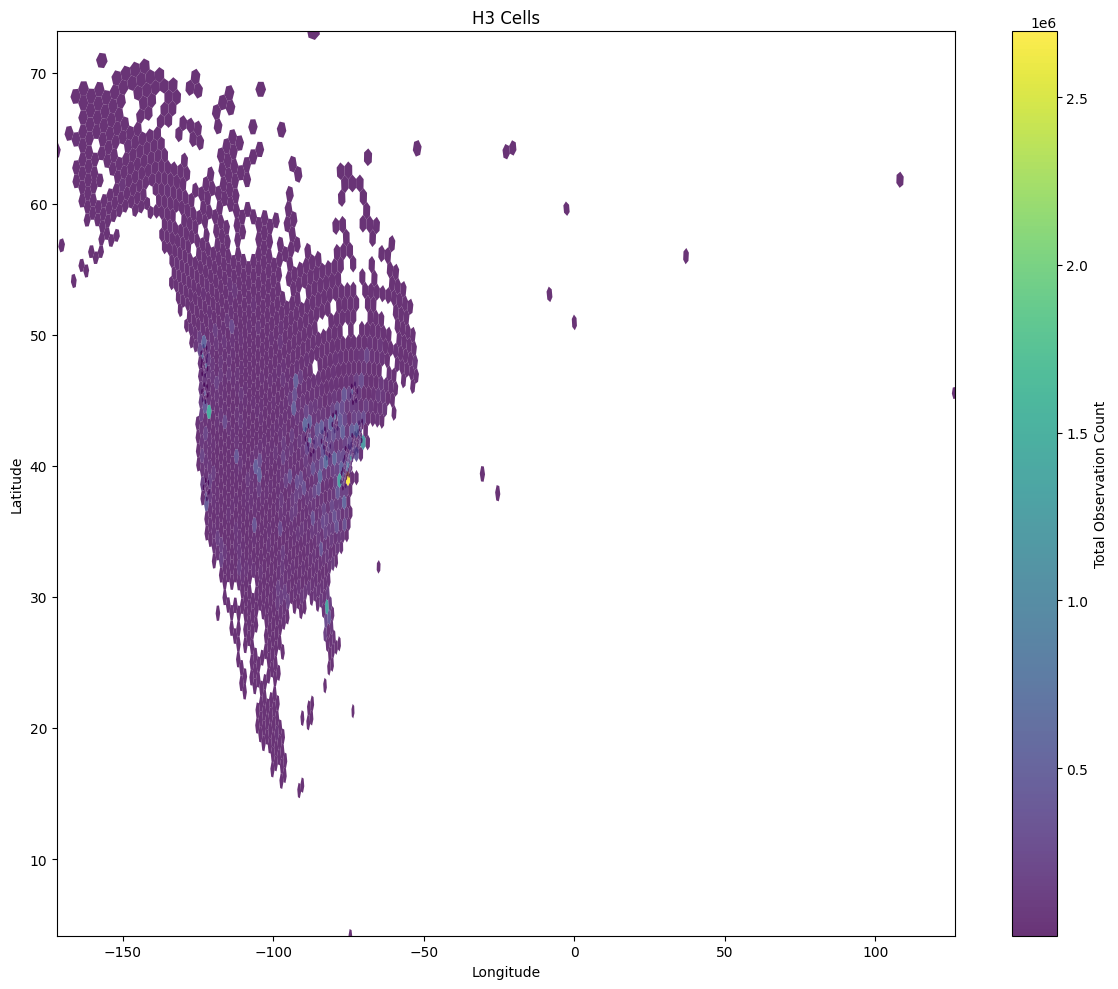

Final hexagon count: 1692
Final resolution: 5


In [11]:
import polars as pl
import h3
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np

# ======================
#  PARAMETERS
# ======================
INITIAL_H3_RESOLUTION = 3
MAX_POINTS_PER_HEX = 100000
MAX_H3_RESOLUTION = 10

# ======================
#  1) ASSIGN INITIAL H3 CELLS
# ======================
# Assuming df already exists with columns: "LATITUDE", "LONGITUDE", "OBSERVATION COUNT"
# Convert to string representation for easier handling in Polars
df = df.with_columns(
    pl.struct(["LATITUDE", "LONGITUDE"]).map_elements(
        lambda row: str(h3.latlng_to_cell(
            row["LATITUDE"],
            row["LONGITUDE"],
            INITIAL_H3_RESOLUTION
        )),
        return_dtype=pl.Utf8  # explicitly declare we return a string
    ).alias("h3_index")
)

current_resolution = INITIAL_H3_RESOLUTION

# ======================
#  2) ITERATIVE REFINEMENT
# ======================
while True:
    # Count how many points (rows) are in each H3 cell
    hex_counts = df.group_by("h3_index").agg(
        pl.len().alias("count")  # pl.len() is the preferred aggregator
    )

    # Identify hexes exceeding the threshold
    hexes_to_split = hex_counts.filter(pl.col("count") > MAX_POINTS_PER_HEX)

    # If no hexes exceed threshold, we're done
    if hexes_to_split.is_empty():
        break

    # If we've reached max resolution, stop refining further
    if current_resolution >= MAX_H3_RESOLUTION:
        print(f"Reached MAX_H3_RESOLUTION ({MAX_H3_RESOLUTION}). Stopping further refinement.")
        break

    to_refine_set = set(hexes_to_split["h3_index"].to_list())
    current_resolution += 1

    print(f"Refining {len(to_refine_set)} hexes to resolution {current_resolution}")

    # Refine only those rows whose 'h3_index' is in to_refine_set
    def refine_if_needed(lat, lon, old_hex):
        if old_hex in to_refine_set:
            return str(h3.latlng_to_cell(lat, lon, current_resolution))
        else:
            return old_hex

    df = df.with_columns(
        pl.struct(["LATITUDE", "LONGITUDE", "h3_index"]).map_elements(
            lambda row: refine_if_needed(
                row["LATITUDE"],
                row["LONGITUDE"],
                row["h3_index"]
            ),
            return_dtype=pl.Utf8
        ).alias("h3_index")
    )

# ======================
#  3) AGGREGATE FINAL HEX CELLS
# ======================
# Summation of "OBSERVATION COUNT" in each hex,
# plus mean lat/lon, and raw point count
centroids = (
    df.group_by("h3_index")
      .agg([
          pl.col("LATITUDE").mean().alias("MEAN_LATITUDE"),
          pl.col("LONGITUDE").mean().alias("MEAN_LONGITUDE"),
          pl.col("OBSERVATION COUNT").sum().alias("TOTAL_OBSERVATIONS"),
          pl.len().alias("POINT_COUNT")
      ])
)

# ======================
#  4) VISUALIZATION
# ======================
def get_hex_boundary(h3_index_str):
    """Get the boundary of a hexagon in lat/lng coordinates"""
    # No conversion needed - directly use the string with cell_to_boundary
    boundary = h3.cell_to_boundary(h3_index_str)
    # Convert to (longitude, latitude) for matplotlib
    return [(lng, lat) for lat, lng in boundary]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Collect all hexagon polygons
polygons = []
colors = []

# Get min/max for color normalization
min_obs = centroids["TOTAL_OBSERVATIONS"].min()
max_obs = centroids["TOTAL_OBSERVATIONS"].max()
norm = plt.Normalize(min_obs, max_obs)

# Create polygons for each hexagon
for row in centroids.iter_rows(named=True):
    hex_boundary = get_hex_boundary(row["h3_index"])
    polygon = Polygon(hex_boundary, closed=True)
    polygons.append(polygon)
    colors.append(row["TOTAL_OBSERVATIONS"])

# Create a collection of polygons
p = PatchCollection(polygons, alpha=0.8, cmap='viridis')
p.set_array(np.array(colors))
p.set_clim(min_obs, max_obs)

# Add the collection to the axis
ax.add_collection(p)

# Add a colorbar
cbar = plt.colorbar(p, ax=ax)
cbar.set_label('Total Observation Count')

# Set axis limits based on data
all_lats = df["LATITUDE"].to_list()
all_lons = df["LONGITUDE"].to_list()
margin = 0.1  # Add some margin
ax.set_xlim(min(all_lons) - margin, max(all_lons) + margin)
ax.set_ylim(min(all_lats) - margin, max(all_lats) + margin)

# Labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'H3 Cells')

# # Add text showing resolution info
# plt.figtext(0.02, 0.02,
#             f"Initial Resolution: {INITIAL_H3_RESOLUTION}\n"
#             f"Final Resolution: {current_resolution}\n"
#             f"Total Hexagons: {len(centroids)}",
#             fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

print(f"Final hexagon count: {len(centroids)}")
print(f"Final resolution: {current_resolution}")

In [ ]:
df

OBSERVATION COUNT,DAY OF YEAR,MONTH,YEAR,SEASON,OBSERVATION DATE,LATITUDE,LONGITUDE,COUNTRY_ENCODED,STATE_ENCODED,COUNTY_ENCODED,h3_index
i64,i16,i8,i32,i32,date,f64,f64,u32,u32,u32,str
70,1,1,2022,1,2022-01-01,35.084377,-106.62034,21,71,246,"""8348d8fffffffff"""
1,1,1,2022,1,2022-01-01,45.477677,-122.751564,21,87,2617,"""8428f01ffffffff"""
2,1,1,2022,1,2022-01-01,39.041677,-77.379929,21,119,1450,"""832aaafffffffff"""
1,1,1,2022,1,2022-01-01,42.452769,-71.408972,21,55,1592,"""852a306bfffffff"""
4,1,1,2022,1,2022-01-01,40.485147,-79.873996,21,89,58,"""832a84fffffffff"""
…,…,…,…,…,…,…,…,…,…,…,…
1,366,12,2024,1,2024-12-31,42.124576,-71.183985,21,55,1737,"""842a339ffffffff"""
40,366,12,2024,1,2024-12-31,35.641198,-105.92605,21,71,2162,"""8348d8fffffffff"""
4,366,12,2024,1,2024-12-31,39.105313,-84.640842,21,84,1018,"""832a93fffffffff"""


In [ ]:
centroids

h3_index,MEAN_LATITUDE,MEAN_LONGITUDE,TOTAL_OBSERVATIONS,POINT_COUNT
str,f64,f64,i64,u32
"""830d4afffffffff""",64.196581,-141.644176,709,210
"""8349abfffffffff""",20.578269,-103.926201,503,153
"""852aa85bfffffff""",39.164579,-77.164464,69005,8797
"""830cf1fffffffff""",59.176135,-161.340603,4,2
"""830e8dfffffffff""",56.030799,-87.665165,117,60
…,…,…,…,…
"""8328aefffffffff""",43.160223,-118.903247,40475,7481
"""8327adfffffffff""",48.632052,-100.943616,7873,1401
"""852a1073fffffff""",40.748625,-74.002956,5388,1279


In [ ]:
test = df.group_by_dynamic("OBSERVATION DATE", every="14d", group_by=["h3_index"]).agg(pl.col("OBSERVATION COUNT").median())

In [ ]:
test

h3_index,OBSERVATION DATE,OBSERVATION COUNT
str,date,f64
"""8348d8fffffffff""",2021-12-23,3.0
"""8348d8fffffffff""",2022-01-06,2.0
"""8348d8fffffffff""",2022-01-20,2.0
"""8348d8fffffffff""",2022-02-03,2.0
"""8348d8fffffffff""",2022-02-17,2.0
…,…,…
"""83450bfffffffff""",2024-11-07,1.0
"""83450bfffffffff""",2024-11-21,1.0
"""832af5fffffffff""",2024-11-07,1.0


In [ ]:
test["OBSERVATION COUNT"].value_counts().sort(pl.col("OBSERVATION COUNT"), descending=True)

OBSERVATION COUNT,count
f64,u32
2000.0,1
600.0,1
400.0,1
380.0,1
287.0,1
…,…
3.0,14451
2.5,1829
2.0,26353


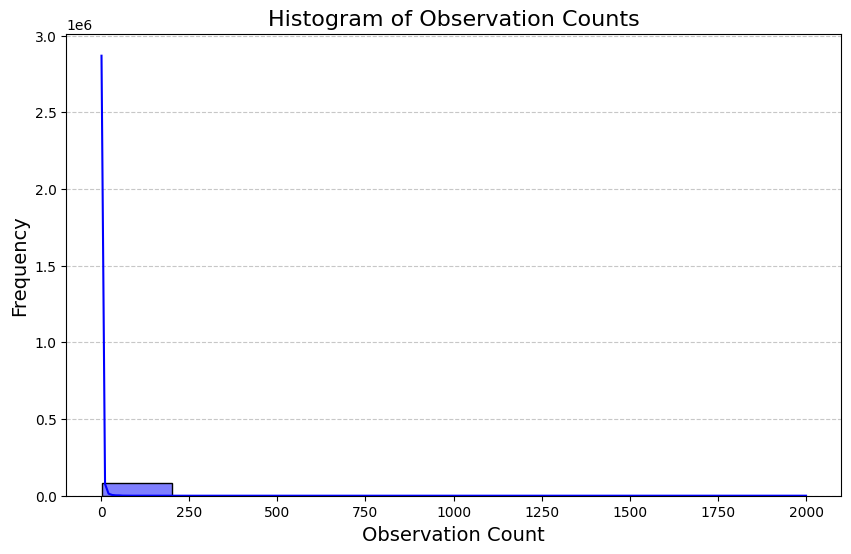

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

observation_counts = test['OBSERVATION COUNT']

# Plot histogram with KDE (density curve)
plt.figure(figsize=(10, 6))
sns.histplot(observation_counts, bins=10, kde=True, color="blue")

# Labels and title
plt.xlabel("Observation Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Observation Counts", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
import polars as pl

# Define function to remove outliers before aggregation
def group_with_outlier_removal(df):
    # First, group by the location columns to calculate outlier bounds
    location_cols = ["h3_index"]

    # Calculate bounds for each location group
    outlier_bounds = df.group_by(location_cols).agg(
        pl.col("OBSERVATION COUNT").quantile(0.25).alias("Q1"),
        pl.col("OBSERVATION COUNT").quantile(0.75).alias("Q3")
    ).with_columns(
        (pl.col("Q3") - pl.col("Q1")).alias("IQR")
    ).with_columns(
        (pl.col("Q1") - 1.5 * pl.col("IQR")).alias("lower_bound"),
        (pl.col("Q3") + 1.5 * pl.col("IQR")).alias("upper_bound")
    )

    # Join the bounds back to original dataframe
    df_with_bounds = df.join(
        outlier_bounds.select(location_cols + ["lower_bound", "upper_bound"]),
        on=location_cols
    )

    # Filter out the outliers
    df_no_outliers = df_with_bounds.filter(
        (pl.col("OBSERVATION COUNT") >= pl.col("lower_bound")) &
        (pl.col("OBSERVATION COUNT") <= pl.col("upper_bound"))
    )

    # Now do the dynamic grouping with median on the filtered data
    return df_no_outliers.group_by_dynamic(
        "OBSERVATION DATE",
        every="14d",
        group_by=location_cols
    ).agg(
        pl.col("OBSERVATION COUNT").median()
    )

# Apply the function to your dataframe
test_clean = group_with_outlier_removal(df)

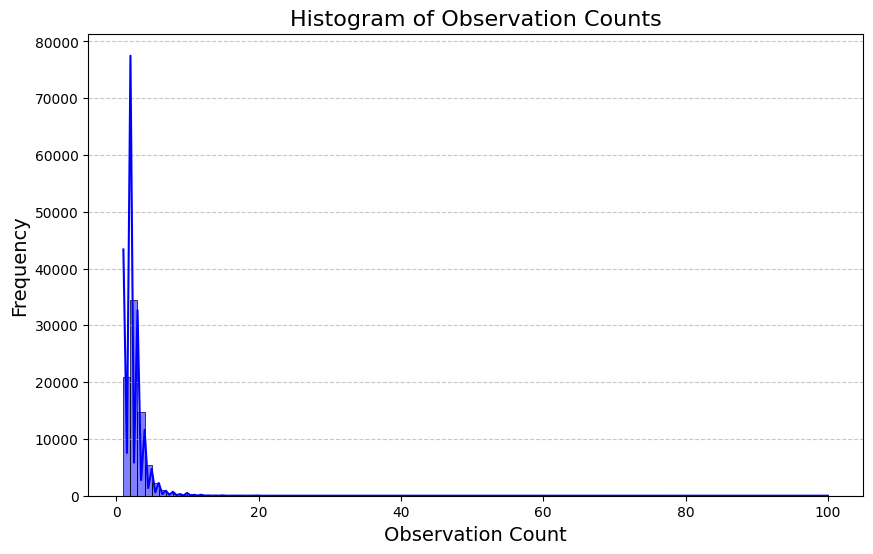

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

observation_counts = test_clean['OBSERVATION COUNT']

# Plot histogram with KDE (density curve)
plt.figure(figsize=(10, 6))
sns.histplot(observation_counts, bins=100, kde=True, color="blue")

# Labels and title
plt.xlabel("Observation Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Histogram of Observation Counts", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
pl.Config.set_tbl_rows(20)
test_clean["OBSERVATION COUNT"].value_counts().sort("OBSERVATION COUNT").limit(20)

OBSERVATION COUNT,count
f64,u32
1.0,18239
1.5,2629
2.0,32601
2.5,1920
3.0,13754
3.5,928
4.0,4892
4.5,482
5.0,1995


In [ ]:
binned = test.with_columns(
    pl.when(pl.col("OBSERVATION COUNT") < 10)
      .then(0)
      .when(pl.col("OBSERVATION COUNT") < 100)
      .then(1)
      .otherwise(2)
      .alias("OBSERVATION COUNT BINNED")
)


In [ ]:
binned["OBSERVATION COUNT BINNED"].value_counts()

OBSERVATION COUNT BINNED,count
i32,u32
0,77932
2,49
1,2911


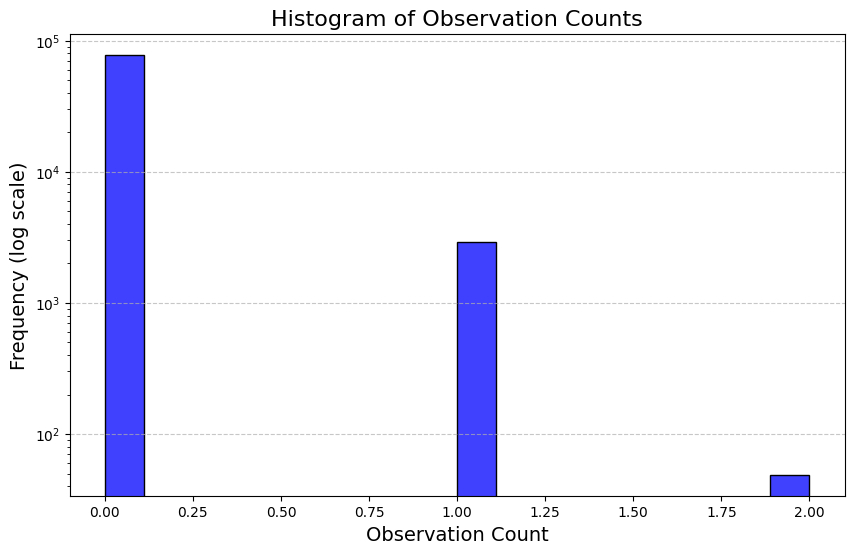

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

observation_counts = binned['OBSERVATION COUNT BINNED']

# Plot histogram with KDE (density curve)
plt.figure(figsize=(10, 6))
sns.histplot(observation_counts, color="blue")

# Set y-axis to log scale
plt.yscale('log')

# Labels and title
plt.xlabel("Observation Count", fontsize=14)
plt.ylabel("Frequency (log scale)", fontsize=14)
plt.title("Histogram of Observation Counts", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
binned


h3_index,OBSERVATION DATE,OBSERVATION COUNT,OBSERVATION COUNT BINNED
str,date,f64,i32
"""8348d8fffffffff""",2021-12-23,3.0,0
"""8348d8fffffffff""",2022-01-06,2.0,0
"""8348d8fffffffff""",2022-01-20,2.0,0
"""8348d8fffffffff""",2022-02-03,2.0,0
"""8348d8fffffffff""",2022-02-17,2.0,0
"""8348d8fffffffff""",2022-03-03,2.0,0
"""8348d8fffffffff""",2022-03-17,2.0,0
"""8348d8fffffffff""",2022-03-31,2.0,0
"""8348d8fffffffff""",2022-04-14,2.0,0


In [ ]:
cen= centroids.select(["h3_index", "MEAN_LATITUDE", "MEAN_LONGITUDE"])
main_df = cen.join(binned, on="h3_index")
main_df

h3_index,MEAN_LATITUDE,MEAN_LONGITUDE,OBSERVATION DATE,OBSERVATION COUNT,OBSERVATION COUNT BINNED
str,f64,f64,date,f64,i32
"""8348d8fffffffff""",35.419432,-106.337994,2021-12-23,3.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-01-06,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-01-20,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-02-03,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-02-17,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-03-03,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-03-17,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-03-31,2.0,0
"""8348d8fffffffff""",35.419432,-106.337994,2022-04-14,2.0,0


In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
main_df_sampled = main_df.sample(10_000)

In [ ]:
main_df_sampled.null_count()

h3_index,MEAN_LATITUDE,MEAN_LONGITUDE,OBSERVATION DATE,OBSERVATION COUNT,OBSERVATION COUNT BINNED
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

def get_weather_data_daily(row):
    """
    Fetches 14 days of DAILY weather data for the location and date in `row`,
    then returns the median values for each variable.
    """

    # Convert 'OBSERVATION DATE' to pandas Timestamp if needed
    # and add 14 days to get the end date
    date_start = pd.to_datetime(row['OBSERVATION DATE'])
    date_end = date_start + pd.Timedelta(days=14)

    # Define the API parameters using data from your dataframe
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": row['MEAN_LATITUDE'],
        "longitude": row['MEAN_LONGITUDE'],
        "start_date": date_start.strftime("%Y-%m-%d"),
        "end_date": date_end.strftime("%Y-%m-%d"),
        "daily": [
            "temperature_2m_max",
            "temperature_2m_min",
            "temperature_2m_mean",
            "rain_sum",
            "snowfall_sum",
            "wind_gusts_10m_max"
        ]
    }

    try:
        # Get the weather data
        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]

        # Process the Daily object
        daily = response.Daily()

        # Extract each variable by index in the same order as requested
        daily_temperature_2m_max  = daily.Variables(0).ValuesAsNumpy()
        daily_temperature_2m_min  = daily.Variables(1).ValuesAsNumpy()
        daily_temperature_2m_mean = daily.Variables(2).ValuesAsNumpy()
        daily_rain_sum            = daily.Variables(3).ValuesAsNumpy()
        daily_snowfall_sum        = daily.Variables(4).ValuesAsNumpy()
        daily_wind_gusts_10m_max  = daily.Variables(5).ValuesAsNumpy()

        # Build a date range for the daily results
        daily_times = pd.date_range(
            start=pd.to_datetime(daily.Time(), unit="s", utc=True),
            end=pd.to_datetime(daily.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=daily.Interval()),
            inclusive="left"
        )

        # Construct a pandas DataFrame
        data = {
            "date":                daily_times,
            "temperature_2m_max":  daily_temperature_2m_max,
            "temperature_2m_min":  daily_temperature_2m_min,
            "temperature_2m_mean": daily_temperature_2m_mean,
            "rain_sum":            daily_rain_sum,
            "snowfall_sum":        daily_snowfall_sum,
            "wind_gusts_10m_max":  daily_wind_gusts_10m_max
        }
        daily_df = pd.DataFrame(data)

        # Calculate median for each numeric column (excluding "date")
        median_values = daily_df.drop(columns="date").median().to_dict()

        # Return a dict of median values
        return median_values

    except Exception as e:
        print(
            f"Error fetching daily weather data for row with "
            f"GLOBAL UNIQUE IDENTIFIER {row.get('GLOBAL UNIQUE IDENTIFIER', 'Unknown')}: {e}"
        )
        # Return a dictionary with None or empty on error
        return {}

In [ ]:
# def process_dataframe(df, target_hour=12, sample_size=None):
#     if sample_size:
#         sample_df = df.sample(sample_size)
#     else:
#         sample_df = df.copy()

#     # Process each row
#     for idx, row in sample_df.iterrows():
#         if pd.notna(row['MEAN_LATITUDE']) and pd.notna(row['MEAN_LONGITUDE']) and pd.notna(row['OBSERVATION DATE']):
#             weather_data = get_weather_data_daily(row)

#             # Update the dataframe with weather data
#             for key, value in weather_data.items():
#                 sample_df.at[idx, key] = value

#             if idx % 10 == 0:
#                 print(f"Processed {idx} rows")

#     return sample_df

# target_hour = 12  # noon

# full_enriched_df = process_dataframe(main_df_sampled.to_pandas(), target_hour=target_hour)
# full_enriched_df.to_csv('bird_observations_with_weather.csv', index=False)

Processed 0 rows
Processed 10 rows
Processed 20 rows
Processed 30 rows
Processed 40 rows
Processed 50 rows
Processed 60 rows
Processed 70 rows
Processed 80 rows
Processed 90 rows
Processed 100 rows
Processed 110 rows
Processed 120 rows
Processed 130 rows
Processed 140 rows
Processed 150 rows
Processed 160 rows
Processed 170 rows
Processed 180 rows
Processed 190 rows
Processed 200 rows
Processed 210 rows
Processed 220 rows
Processed 230 rows
Processed 240 rows
Processed 250 rows
Processed 260 rows
Processed 270 rows
Processed 280 rows
Processed 290 rows
Processed 300 rows
Processed 310 rows
Processed 320 rows
Processed 330 rows
Processed 340 rows
Processed 350 rows
Processed 360 rows
Processed 370 rows
Processed 380 rows
Processed 390 rows
Processed 400 rows
Processed 410 rows
Processed 420 rows
Processed 430 rows
Processed 440 rows
Processed 450 rows
Processed 460 rows
Processed 470 rows
Processed 480 rows
Processed 490 rows
Processed 500 rows
Processed 510 rows
Processed 520 rows
Proc

In [ ]:
weatherdf = pl.from_pandas(full_enriched_df).drop_nulls()

In [ ]:
weatherdf = weatherdf.with_columns([
    pl.col("OBSERVATION DATE").dt.year().alias("YEAR"),
    pl.col("OBSERVATION DATE").dt.month().alias("MONTH"),
    pl.col("OBSERVATION DATE").dt.ordinal_day().alias("DAY OF YEAR")
])
weatherdf = weatherdf.with_columns(
    pl.when(pl.col("MONTH").is_in([12, 1, 2])).then(1)
    .when(pl.col("MONTH").is_in([3, 4, 5])).then(2)
    .when(pl.col("MONTH").is_in([6, 7, 8])).then(3)
    .when(pl.col("MONTH").is_in([9, 10, 11])).then(4)
    .otherwise(None)
    .alias("SEASON")
)


In [ ]:
weatherdf.columns

['h3_index',
 'MEAN_LATITUDE',
 'MEAN_LONGITUDE',
 'OBSERVATION DATE',
 'OBSERVATION COUNT',
 'OBSERVATION COUNT BINNED',
 'temperature_2m_max',
 'temperature_2m_min',
 'temperature_2m_mean',
 'rain_sum',
 'snowfall_sum',
 'wind_gusts_10m_max']

In [ ]:
X = weatherdf[["DAY OF YEAR", "YEAR", "MONTH", "SEASON", 'h3_index',
 'MEAN_LATITUDE',
 'MEAN_LONGITUDE',
 'temperature_2m_max',
 'temperature_2m_min',
 'temperature_2m_mean',
 'rain_sum',
 'snowfall_sum',
 'wind_gusts_10m_max']]
y = weatherdf["OBSERVATION COUNT BINNED"]

In [ ]:
y

OBSERVATION COUNT
f64
2.0
2.0
4.0
4.0
2.0
8.0
10.0
1.5
1.0


In [ ]:
X = X.with_columns(X["h3_index"].cast(pl.Categorical))
dummies = X["h3_index"].to_dummies()  # This returns a new DataFrame with dummy columns

# Optionally, drop the original column and add the dummy columns
X = X.drop("h3_index").hstack(dummies)
print(X)

shape: (8_620, 1_419)
┌─────────────┬──────┬───────┬────────┬───┬──────────────┬─────────────┬─────────────┬─────────────┐
│ DAY OF YEAR ┆ YEAR ┆ MONTH ┆ SEASON ┆ … ┆ h3_index_852 ┆ h3_index_85 ┆ h3_index_85 ┆ h3_index_85 │
│ ---         ┆ ---  ┆ ---   ┆ ---    ┆   ┆ aa85bfffffff ┆ 2aa87bfffff ┆ 2aa8cffffff ┆ 2aae27fffff │
│ i16         ┆ i32  ┆ i8    ┆ i32    ┆   ┆ ---          ┆ ff          ┆ ff          ┆ ff          │
│             ┆      ┆       ┆        ┆   ┆ u8           ┆ ---         ┆ ---         ┆ ---         │
│             ┆      ┆       ┆        ┆   ┆              ┆ u8          ┆ u8          ┆ u8          │
╞═════════════╪══════╪═══════╪════════╪═══╪══════════════╪═════════════╪═════════════╪═════════════╡
│ 19          ┆ 2023 ┆ 1     ┆ 1      ┆ … ┆ 0            ┆ 0           ┆ 0           ┆ 0           │
│ 313         ┆ 2023 ┆ 11    ┆ 4      ┆ … ┆ 0            ┆ 0           ┆ 0           ┆ 0           │
│ 116         ┆ 2024 ┆ 4     ┆ 2      ┆ … ┆ 0            ┆ 0         

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.to_pandas())
X_test_scaled = scaler.transform(X_test.to_pandas())

In [ ]:
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_torch = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [ ]:
class BirdNN(nn.Module):
    def __init__(self):
        super(BirdNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 3)  # 3 density classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [ ]:
# Train Neural Network
print("Training Neural Network")
model = BirdNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Training Neural Network


In [ ]:
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 1.1159
Epoch 2, Loss: 1.0535
Epoch 3, Loss: 0.9951
Epoch 4, Loss: 0.9402
Epoch 5, Loss: 0.8878
Epoch 6, Loss: 0.8375
Epoch 7, Loss: 0.7887
Epoch 8, Loss: 0.7411
Epoch 9, Loss: 0.6944
Epoch 10, Loss: 0.6486
Epoch 11, Loss: 0.6036
Epoch 12, Loss: 0.5596
Epoch 13, Loss: 0.5167
Epoch 14, Loss: 0.4751
Epoch 15, Loss: 0.4351
Epoch 16, Loss: 0.3970
Epoch 17, Loss: 0.3611
Epoch 18, Loss: 0.3278
Epoch 19, Loss: 0.2972
Epoch 20, Loss: 0.2697
Epoch 21, Loss: 0.2451
Epoch 22, Loss: 0.2237
Epoch 23, Loss: 0.2053
Epoch 24, Loss: 0.1896
Epoch 25, Loss: 0.1766
Epoch 26, Loss: 0.1658
Epoch 27, Loss: 0.1570
Epoch 28, Loss: 0.1498
Epoch 29, Loss: 0.1439
Epoch 30, Loss: 0.1390
Epoch 31, Loss: 0.1349
Epoch 32, Loss: 0.1314
Epoch 33, Loss: 0.1283
Epoch 34, Loss: 0.1255
Epoch 35, Loss: 0.1230
Epoch 36, Loss: 0.1206
Epoch 37, Loss: 0.1184
Epoch 38, Loss: 0.1163
Epoch 39, Loss: 0.1144
Epoch 40, Loss: 0.1125
Epoch 41, Loss: 0.1108
Epoch 42, Loss: 0.1091
Epoch 43, Loss: 0.1076
Epoch 44, Loss: 0.10

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_torch)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_torch).float().mean().item()
    print("Neural Network Accuracy:", accuracy)

Neural Network Accuracy: 0.9547563791275024


Confusion Matrix:
 [[1642   29    0]
 [  48    4    0]
 [   1    0    0]]


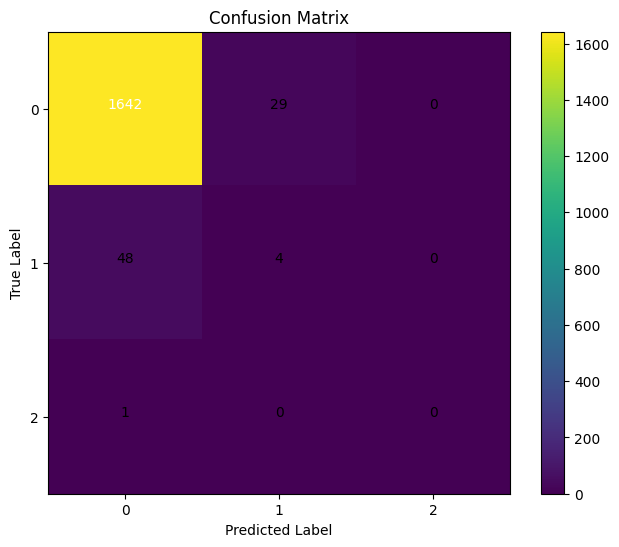

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch
import numpy as np
from sklearn.metrics import confusion_matrix

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_torch)
    _, predicted = torch.max(test_outputs, 1)

# Convert tensors to NumPy arrays
y_true = y_test_torch.cpu().numpy()
y_pred = predicted.cpu().numpy()

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Assume y_true and y_pred are your true and predicted labels as numpy arrays
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

# Optionally add labels and annotate the matrix with counts
tick_marks = range(cm.shape[0])
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Annotate each cell with the count value
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


In [ ]:
# def filter_by_month(df, month):

#     # Filter data for the specific month
#     month_data = df.filter(pl.col("MONTH") == month)

#     # Plotting the data for the selected month
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(
#         x=month_data['LONGITUDE'],
#         y=month_data['LATITUDE'],
#         hue=month_data['COUNTY_ENCODED'],
#         palette='viridis',
#         edgecolor='black',
#         legend=False
#     )

#     plt.xlabel("Longitude")
#     plt.ylabel("Latitude")
#     plt.title(f"Bird Locations for Month {month}")
#     plt.show()

# filter_by_month(df, 3)

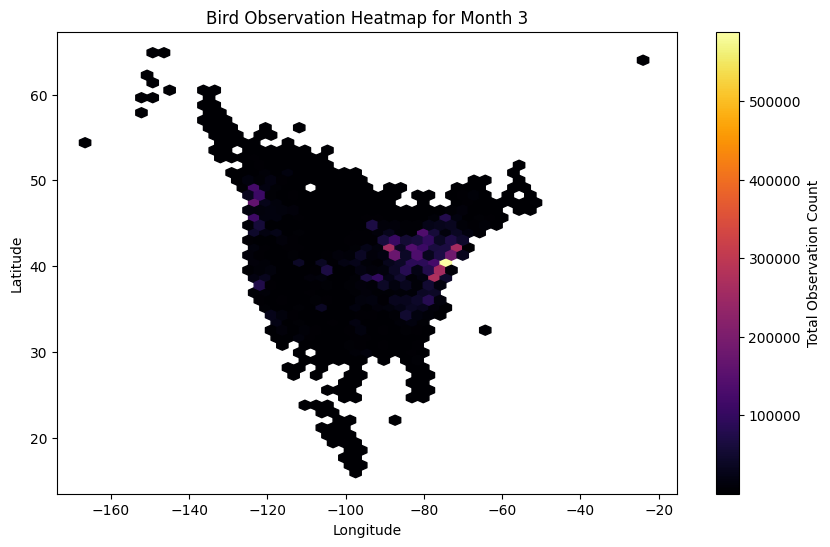

In [ ]:
def filter_by_month_heatmap(df, month):
    # Filter data for the specific month and day
    month_data = df.filter(pl.col("MONTH") == month)

    # Create heatmap using hexbin
    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(
        month_data['LONGITUDE'],
        month_data['LATITUDE'],
        C=month_data['OBSERVATION COUNT'],
        gridsize=50,  # Adjust for resolution
        cmap='inferno',
        reduce_C_function=np.sum
    )

    plt.colorbar(hb, label='Total Observation Count')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Bird Observation Heatmap for Month {month}")
    plt.show()

# Example: Generate heatmap for March (3)
filter_by_month_heatmap(df, 3)

In [ ]:
# df.filter(pl.col("YEAR") >= 2021).collect().shape